# SMOTE

In [2]:
#pip install imbalanced-learn


In [5]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# create a binary classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.98],
    random_state=125,
)

labels = Counter(y)
print("y labels after oversampling")
print(labels)

y labels after oversampling
Counter({0: 970, 1: 30})


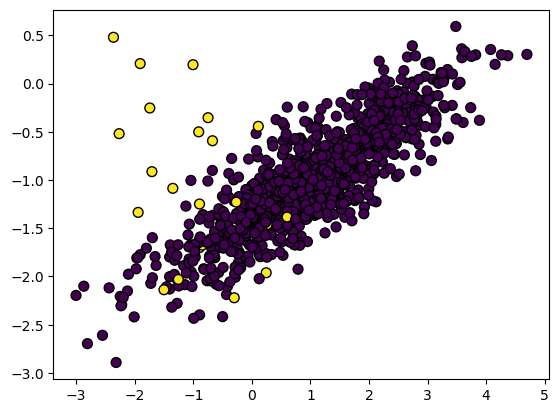

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, edgecolor="k");

In [9]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
result = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean AUC: %.3f" % np.mean(result))

Mean AUC: 0.626


In [11]:
over = SMOTE()

X, y = over.fit_resample(X, y)

labels = Counter(y)
print("y labels after oversampling")
print(labels)

y labels after oversampling
Counter({0: 970, 1: 970})


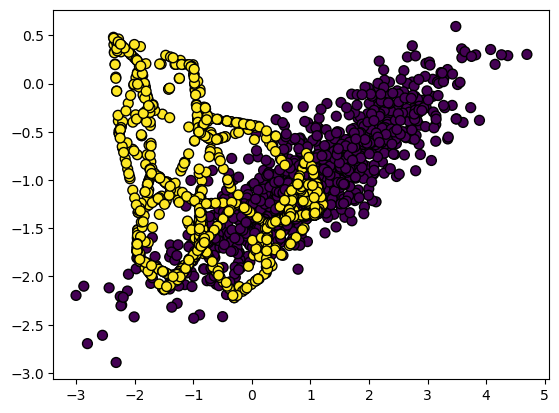

In [13]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, edgecolor="k");


In [15]:
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
result = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)

print("Mean AUC: %.3f" % np.mean(result))

Mean AUC: 0.846


----------------------------

In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
X,y = make_classification(n_classes=2, class_sep=1.5, weights=[0.9, 0.1],n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1,n_samples=100, random_state=10)
X = pd.DataFrame(X)
X['target'] = y

----------------------------------

In [41]:
df = pd.read_csv("failure.csv")

In [65]:
dfd = pd.read_csv("failure.csv")

In [45]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [47]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [49]:
df = df.sample(1000)

In [55]:
df.reset_index(drop=True, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   device      1000 non-null   object
 2   failure     1000 non-null   int64 
 3   attribute1  1000 non-null   int64 
 4   attribute2  1000 non-null   int64 
 5   attribute3  1000 non-null   int64 
 6   attribute4  1000 non-null   int64 
 7   attribute5  1000 non-null   int64 
 8   attribute6  1000 non-null   int64 
 9   attribute7  1000 non-null   int64 
 10  attribute8  1000 non-null   int64 
 11  attribute9  1000 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 93.9+ KB


In [61]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [81]:
df["device"].value_counts()

device
W1F1CLBY    7
S1F11XDA    7
Z1F0QK05    6
W1F0ZVD8    6
S1F044ET    6
           ..
S1F0LR01    1
Z1F0D8DV    1
W1F0T960    1
W1F0Z4X2    1
S1F135D3    1
Name: count, Length: 510, dtype: int64

In [83]:
df['date'] = pd.to_datetime(df['date'])

In [87]:
type(df['date'])

pandas.core.series.Series

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   device      1000 non-null   object        
 2   failure     1000 non-null   int64         
 3   attribute1  1000 non-null   int64         
 4   attribute2  1000 non-null   int64         
 5   attribute3  1000 non-null   int64         
 6   attribute4  1000 non-null   int64         
 7   attribute5  1000 non-null   int64         
 8   attribute6  1000 non-null   int64         
 9   attribute7  1000 non-null   int64         
 10  attribute8  1000 non-null   int64         
 11  attribute9  1000 non-null   int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 93.9+ KB


In [91]:
df['year'] = df['date'].dt.year

In [93]:
df['month'] = df['date'].dt.month

In [95]:
df['day'] = df['date'].dt.day

In [111]:
df = df.drop(columns=['year'])

In [119]:
df = df.drop(columns=['date'])

In [123]:
df["month"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   failure     1000 non-null   int64
 1   attribute1  1000 non-null   int64
 2   attribute2  1000 non-null   int64
 3   attribute3  1000 non-null   int64
 4   attribute4  1000 non-null   int64
 5   attribute5  1000 non-null   int64
 6   attribute6  1000 non-null   int64
 7   attribute7  1000 non-null   int64
 8   attribute8  1000 non-null   int64
 9   attribute9  1000 non-null   int64
 10  month       1000 non-null   int32
 11  day         1000 non-null   int32
dtypes: int32(2), int64(10)
memory usage: 86.1 KB


In [125]:
df['month'] = df['month'].astype('category')
df['day'] = df['day'].astype('category')

In [127]:
df_dummies = pd.get_dummies(df, columns=['month', 'day'])

In [135]:
df.corr(numeric_only=True)

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.030649,-0.002126,-0.002666,-0.003697,-0.004924,-0.000535,-0.002115,-0.002115,-0.002684
attribute1,0.030649,1.000000,-0.034280,-0.024590,-0.017561,-0.020300,-0.003445,-0.029338,-0.029338,-0.026435
attribute2,-0.002126,-0.034280,1.000000,-0.005658,0.006338,-0.014968,-0.026500,0.090014,0.090014,-0.005309
attribute3,-0.002666,-0.024590,-0.005658,1.000000,-0.006119,-0.010369,0.029278,-0.005634,-0.005634,0.656825
attribute4,-0.003697,-0.017561,0.006338,-0.006119,1.000000,-0.026999,0.074966,0.010384,0.010384,-0.009444
attribute5,-0.004924,-0.020300,-0.014968,-0.010369,-0.026999,1.000000,-0.000290,-0.022293,-0.022293,0.018475
attribute6,-0.000535,-0.003445,-0.026500,0.029278,0.074966,-0.000290,1.000000,0.015458,0.015458,0.036650
attribute7,-0.002115,-0.029338,0.090014,-0.005634,0.010384,-0.022293,0.015458,1.000000,1.000000,-0.005662
attribute8,-0.002115,-0.029338,0.090014,-0.005634,0.010384,-0.022293,0.015458,1.000000,1.000000,-0.005662
attribute9,-0.002684,-0.026435,-0.005309,0.656825,-0.009444,0.018475,0.036650,-0.005662,-0.005662,1.000000


In [139]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [145]:
x = df_dummies.drop("failure",axis=1)
y = df_dummies[["failure"]]


In [141]:
g=GaussianNB()
b=BernoulliNB()

In [147]:
from sklearn.model_selection import train_test_split

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [153]:
g.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [155]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [157]:
gtahmin=g.predict(x_test)

In [159]:
accuracy_score(gtahmin,y_test)

1.0

In [161]:
confusion_matrix(gtahmin,y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[200]], dtype=int64)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<Axes: >

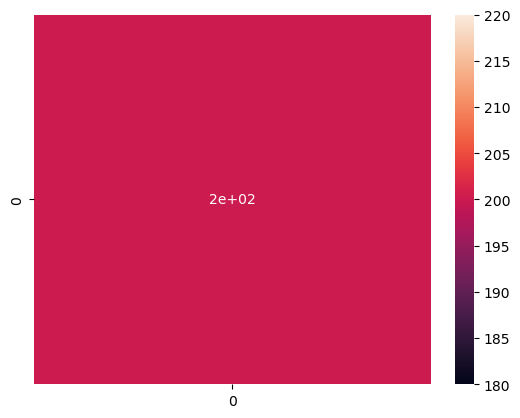

In [163]:
sns.heatmap(confusion_matrix(gtahmin,y_test), annot=True)

In [165]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [167]:
b.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [169]:
btahmin=b.predict(x_test)

In [171]:
accuracy_score(btahmin,y_test)

1.0

In [173]:
confusion_matrix(btahmin,y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[200]], dtype=int64)

In [175]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# SMOTE

In [180]:
from sklearn.linear_model import LogisticRegression

In [182]:
l=LogisticRegression()

In [184]:
l.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [186]:
ltahmin=l.predict(x_test)

In [188]:
confusion_matrix(ltahmin,y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[200]], dtype=int64)

In [190]:
accuracy_score(ltahmin,y_test)

1.0

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
d=DecisionTreeClassifier()

In [196]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [198]:
dtahmin=d.predict(x_test)

In [200]:
print(classification_report(dtahmin,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [202]:
accuracy_score(dtahmin,y_test)

1.0

In [204]:
confusion_matrix(dtahmin,y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[200]], dtype=int64)

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [208]:
r=RandomForestClassifier()

In [210]:
r.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [212]:
rtahmin=r.predict(x_test)

In [214]:
confusion_matrix(rtahmin,y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[200]], dtype=int64)

In [216]:
from sklearn.ensemble import GradientBoostingClassifier

In [218]:
h=GradientBoostingClassifier()

In [220]:
h.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [222]:
htahmin=h.predict(x_test)

In [224]:
confusion_matrix(htahmin,y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[200]], dtype=int64)

In [226]:
print(classification_report(htahmin,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [228]:
from sklearn.neighbors import KNeighborsClassifier

In [232]:
k=KNeighborsClassifier()

In [234]:
k.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [236]:
ktahmin=k.predict(x_test)

In [238]:
confusion_matrix(ktahmin,y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[200]], dtype=int64)

In [240]:
print(classification_report(ktahmin,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



------------------------------------------------

In [245]:
from imblearn.over_sampling import SMOTE

In [265]:
oversample = SMOTE(k_neighbors=1)
x, y = oversample.fit_resample(x, y)

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 2, n_samples_fit = 1, n_samples = 1

In [271]:
dfd = dfd.drop(["date", "device"], axis=1)

In [277]:
x = dfd.drop("failure", axis=1)
y = dfd[["failure"]]

#x = df_dummies.drop("failure",axis=1)
#y = df_dummies[["failure"]]

In [279]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [285]:
from sklearn.neighbors import KNeighborsClassifier

In [287]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [289]:
k=KNeighborsClassifier()

In [291]:
k.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [293]:
ktahmin=k.predict(x_test)

In [295]:
confusion_matrix(ktahmin,y_test)

array([[19828,  2447],
       [ 4924, 22557]], dtype=int64)

In [297]:
print(classification_report(ktahmin,y_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     22275
           1       0.90      0.82      0.86     27481

    accuracy                           0.85     49756
   macro avg       0.85      0.86      0.85     49756
weighted avg       0.86      0.85      0.85     49756



<Axes: xlabel='failure', ylabel='count'>

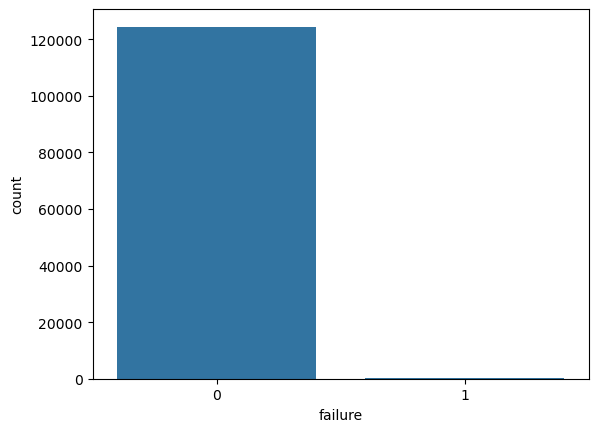

In [315]:
sns.countplot(x=dfd["failure"])

<Axes: xlabel='failure', ylabel='count'>

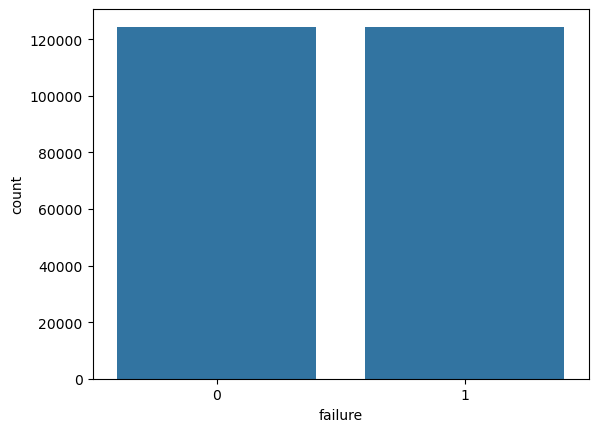

In [313]:
sns.countplot(x=y["failure"])

In [319]:
labels = Counter(y)
print("y labels after oversampling")
print(labels)

y labels after oversampling
Counter({'failure': 1})


In [351]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248776 entries, 0 to 248775
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   failure  248776 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


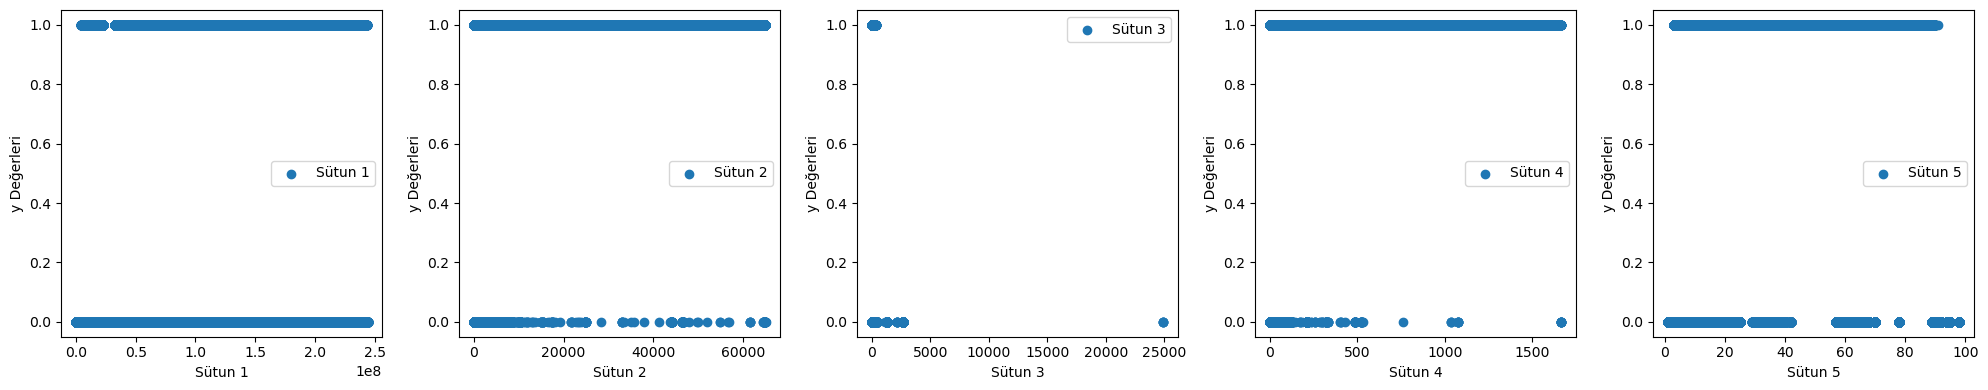

In [363]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Limit the iteration to the minimum of the number of columns or 5
num_columns = min(x.shape[1], 5)

for i in range(num_columns):
    axs[i].scatter(x.iloc[:, i], y, label=f'Sütun {i+1}')  # Use .iloc for integer-based indexing
    axs[i].set_xlabel(f'Sütun {i+1}')
    axs[i].set_ylabel('y Değerleri')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [380]:
z = x[["attribute7"]]

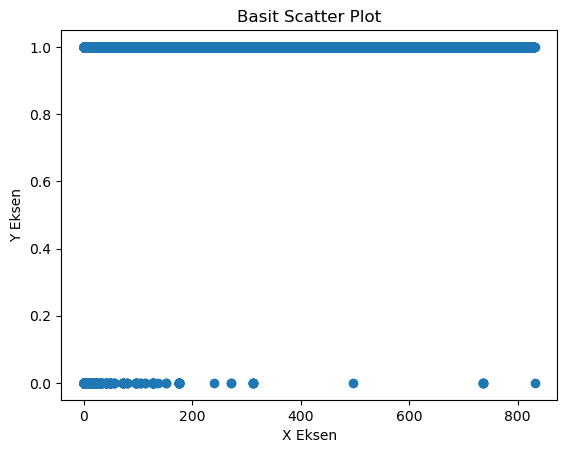

In [382]:
plt.scatter(z, y)
plt.xlabel('X Eksen')
plt.ylabel('Y Eksen')
plt.title('Basit Scatter Plot')
plt.show()

In [392]:
x.columns

Index(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute8', 'attribute9'],
      dtype='object')

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not         failure
0             0
1             0
2             0
3             0
4             0
...         ...
248771        1
248772        1
248773        1
248774        1
248775        1

[248776 rows x 1 columns]

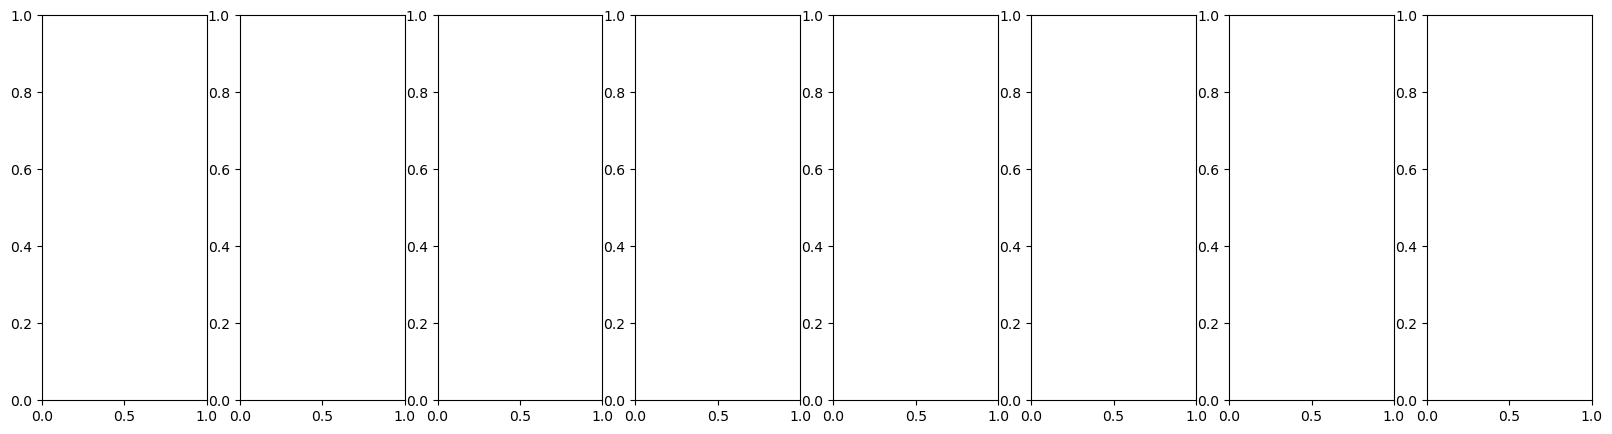

In [394]:
num_features = x.shape[1]

# Create subplots
fig, axs = plt.subplots(1, num_features - 1, figsize=(20, 5))

# Iterate over pairs of features and plot them
for i in range(num_features - 1):
    axs[i].scatter(x.iloc[:, i], x.iloc[:, i + 1], marker="o", c=y, s=50, edgecolor="k", cmap='coolwarm')
    axs[i].set_xlabel(x.columns[i])
    axs[i].set_ylabel(x.columns[i + 1])
    axs[i].set_title(f'{x.columns[i]} vs {x.columns[i + 1]}')

plt.tight_layout()
plt.show()

In [396]:
y_numeric = np.where(y == 'success', 1, 0)

In [398]:
num_features = x.shape[1]

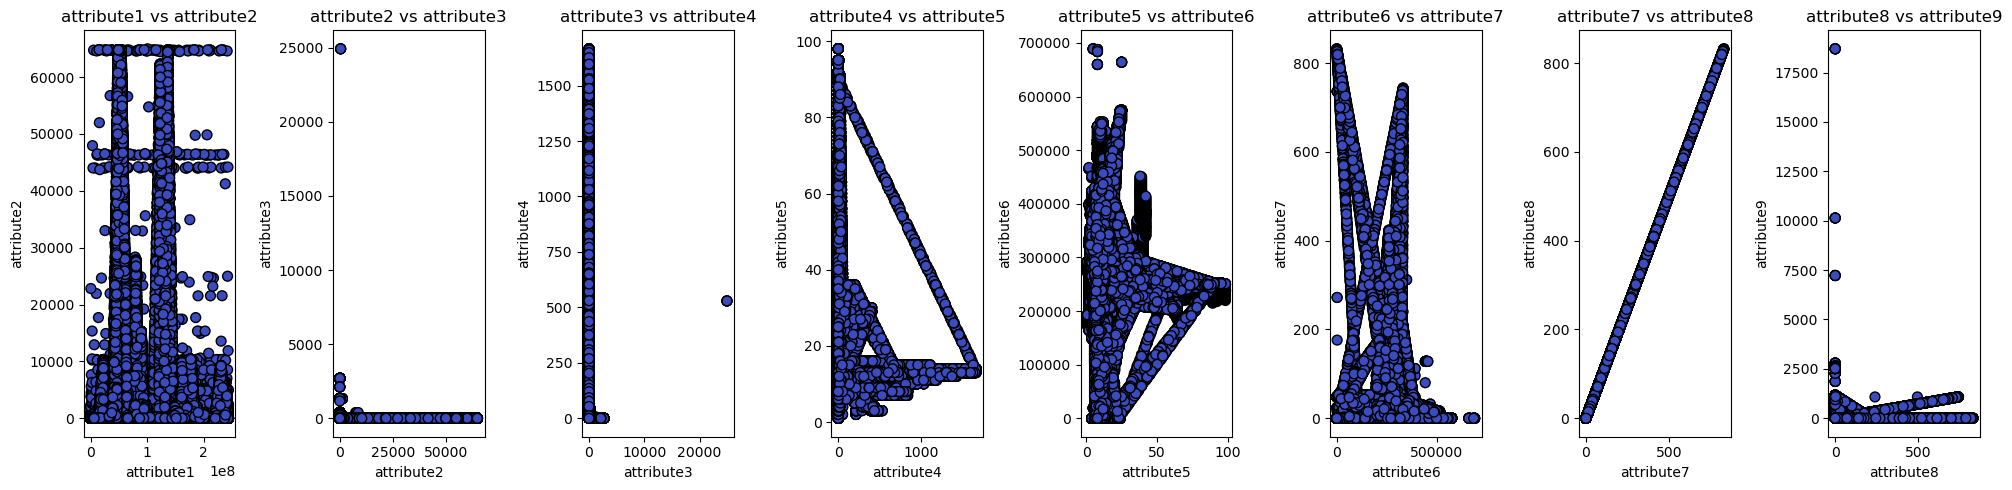

In [400]:
fig, axs = plt.subplots(1, num_features - 1, figsize=(20, 5))

# Iterate over pairs of features and plot them
for i in range(num_features - 1):
    axs[i].scatter(x.iloc[:, i], x.iloc[:, i + 1], marker="o", c=y_numeric, s=50, edgecolor="k", cmap='coolwarm')
    axs[i].set_xlabel(x.columns[i])
    axs[i].set_ylabel(x.columns[i + 1])
    axs[i].set_title(f'{x.columns[i]} vs {x.columns[i + 1]}')

plt.tight_layout()
plt.show()